# Bayesian Updating for Simulated Claim Cashflows
This notebook simulates claim cashflows and applies Bayesian updating to estimate recovery probability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
np.random.seed(42)

## Simulate Claim Cashflows

In [2]:
n_claims = 100
true_recovery_rate = 0.65
recoveries = np.random.binomial(1, true_recovery_rate, size=n_claims)
recovery_times = np.where(recoveries==1, np.random.exponential(scale=30, size=n_claims), np.nan)
claims = pd.DataFrame({'recovered': recoveries,'recovery_time': recovery_times})
claims.head()

,recovered,recovery_time
0,1,0.958010
1,0,NaN
2,0,NaN
3,1,21.313115
4,1,71.437966


## Bayesian Updating on Recovery Probability

In [3]:
alpha_prior, beta_prior = 2, 2
alpha_post = alpha_prior + claims['recovered'].sum()
beta_post = beta_prior + n_claims - claims['recovered'].sum()
posterior_mean = alpha_post / (alpha_post + beta_post)
posterior_mean

0.6730769230769231

## Posterior Distribution Plot

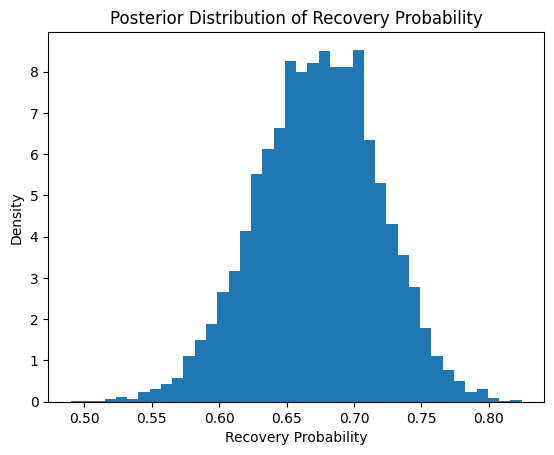

In [4]:
samples = beta.rvs(alpha_post, beta_post, size=5000)
plt.hist(samples, bins=40, density=True)
plt.xlabel('Recovery Probability')
plt.ylabel('Density')
plt.title('Posterior Distribution of Recovery Probability')
plt.show()

## Estimate Expected Cashflow

In [5]:
claim_amount = 1000
expected_cashflow = posterior_mean * claim_amount
expected_cashflow

673.0769230769231

## Interpretation
The posterior distribution shifting to the right means the model believes the recovery probability is **higher** than the prior.
A higher posterior mean implies **expected payments go up**, not down.

If the posterior shifted left, expected payments would decrease.
In this run, recoveries were strong (65%), so the posterior moves toward higher probabilities.